<h4>Text classification using spacy word vectors</h4>

In [2]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_lg")
df = pd.read_csv("../NLP/nlp-tutorials-main/14_word_vectors_spacy_text_classification/Fake_Real_Data.csv")

c:\Users\Ola\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [4]:
df.shape

(9900, 2)

In [8]:
df['LABEL'] = df.label.apply(lambda x: 0 if x =="Fake" else 1 )
# OR
# df['LABEL'] = df.label.map({'Fake}:0, 'Real':1)

In [6]:
df.head()

,Text,label,LABEL
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [7]:
df.LABEL.value_counts()

0    5000
1    4900
Name: LABEL, dtype: int64

In [9]:
nlp("Top Trump Surrogate BRUTALLY Stabs Him In The").vector.shape


(300,)

**Get spacy word vectors and store them in a pandas dataframe**

In [13]:
df['Vector_text'] = df.Text.apply(lambda x: nlp(x).vector)

In [32]:
df.head()

,Text,label,LABEL,Vector_text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df.Vector_text,
    df.LABEL,
    test_size=0.2,
    random_state=2023
)

In [16]:
x_test

8554    [-2.2348604, 0.22982351, -1.0296316, 0.506712,...
1182    [-2.1339717, -0.015424478, -1.9583892, 0.74525...
4000    [-1.6462259, 0.13646555, -1.7770932, 0.2486375...
1466    [-1.3659636, 0.17391922, -0.94987667, 0.311758...
4598    [-1.0722939, -0.85846686, -0.704292, 0.4089563...
                              ...                        
3445    [-1.668454, 0.88043797, -2.016059, 0.75481087,...
9121    [-1.686962, 0.32447094, -2.0996397, 0.41059184...
2419    [-1.386372, 0.8529131, -1.7535349, 0.6124359, ...
8377    [-1.5609536, 0.15179914, -1.8035207, -0.219104...
7096    [-2.2271047, 0.7044026, -1.7476438, 0.46413857...
Name: Vector_text, Length: 1980, dtype: object

In [25]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_2d = np.stack(x_train)
x_test_2d=np.stack(x_test)

scaled_train = scaler.fit_transform(x_train_2d)
scaled_test = scaler.fit_transform(x_test_2d)

In [26]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(scaled_train, y_train)

MultinomialNB()

In [28]:
from sklearn.metrics import classification_report
y_pred = clf.predict(scaled_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1004
           1       0.97      0.93      0.95       976

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [30]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(x_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(x_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1004
           1       0.99      0.99      0.99       976

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



Text(95.72222222222221, 0.5, 'Truth')

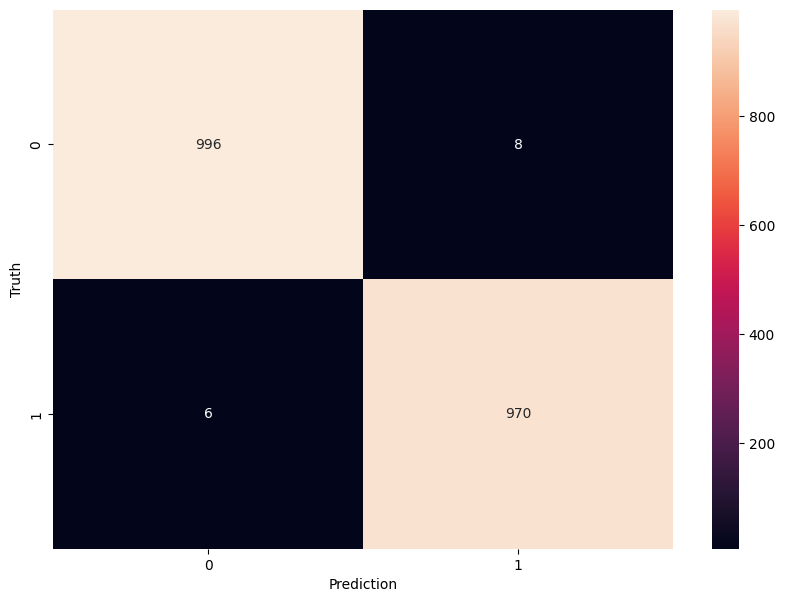

In [31]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

#### Key Takeaways

1. KNN model which didn't perform well in the vectorization techniques like Bag of words, and TF-IDF due to very **high dimensional vector space**, performed really well with glove vectors due to only **300-dimensional** vectors and very good embeddings(similar and related words have almost similar embeddings) for the given text data.

2. MultinomialNB model performed decently well but did not come into the top list because in the 300-dimensional vectors we also have the negative values present. The Naive Bayes model does not fit the data if there are **negative values**. So, to overcome this shortcoming, we have used the **Min-Max scaler** to bring down all the values between 0 to 1. In this process, there will be a possibility of variance and information loss among the data. But anyhow we got a decent recall and f1 scores.